## Adding Classes to a Package

### Anatomy of a class
working in `work_dir/my_package/my_class.py`

In [ ]:
# Define a minimal class with an attribute
class MyClass:
    """A minimal example class 
    :param value: value to set as the ``attribute`` attribute  
    :ivar attribute: contains the contents of ``value`` passed in init  
    """
    # Method to create a new instance of MyClass
    def __init__(self, value):
        # Define attribute with the contents of the value param      
        self.attribute = value

### Using a class in a package
working in `work_dir/my_package/__init__.py`

In [ ]:
from .my_class import MyClass

working in `work_dir/my_script.py`

In [ ]:
import my_package

# Create instance of MyClass
my_instance = my_package.MyClass(value='class attribute value')

# Print out class attribute value
print(my_instance.attribute)

### The self convention 
working in `work_dir/my_package/my_class.py`

In [ ]:
# Define a minimal class with an attribute
class MyClass:
    """A minimal example class   
    :param value: value to set as the ``attribute`` attribute  
    :ivar attribute: contains the contents of ``value`` passed in init   
    """
    # Method to create a new instance of MyClass
    def __init__(self, value):
        # Define attribute with the contents of the value param  
        self.attribute = value

In [ ]:
my_instance = my_package.MyClass(value='class attribute value')

In [ ]:
# Practice 1

# Define Document class
class Document:
    """A class for text analysis
    
    :param text: string of text to be analyzed
    :ivar text: string of text to be analyzed; set by `text` parameter
    """
    # Method to create a new instance of Document
    def __init__(self, text):
        # Store text parameter to the text attribute
        self.text = text

In [ ]:
# Practice 2

# Import custom text_analyzer package
import text_analyzer

# Create an instance of Document with datacamp_tweet
my_document = text_analyzer.Document(text=datacamp_tweet)

# Print the text attribute of the Document instance
print(my_document.text)

## Leveraging Classes

### Extending Document class

In [ ]:
class Document:
    def __init__(self, text):    
        self.text = text

### Revisiting `__init__`

In [ ]:
class Document:
    def __init__(self, text):       
        self.text = text       
        self.tokens = self._tokenize()

doc = Document('test doc')
print(doc.tokens)

### Adding _tokenize() method

In [ ]:
# Import function to perform tokenization
from .token_utils import tokenize

class Document:
    def __init__(self, text, token_regex=r'[a-zA-Z]+'):  
        self.text = text       
        self.tokens = self._tokenize()
        
    def _tokenize(self):
        return tokenize(self.text)

### The DRY principle
- D: Don't
- R: Repeat
- Y: Yourself

### Inheritance in Python
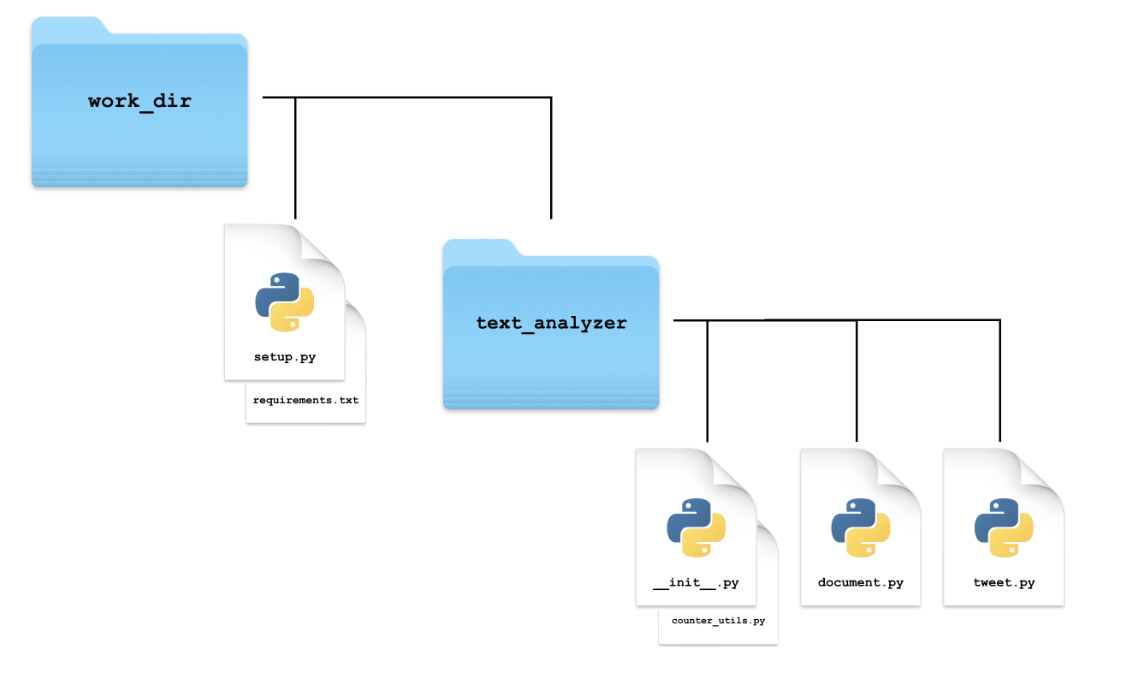

In [ ]:
# Import ParentClass object
from .parent_class import ParentClass

# Create a child class with inheritance
class ChildClass(ParentClass):
    def __init__(self):
        # Call parent's __init__ method   
        ParentClass.__init__(self)
        # Add attribute unique to child class   
        self.child_attribute = "I'm a child class attribute!"

# Create a ChildClass instance
child_class = ChildClass()
print(child_class.child_attribute)
print(child_class.parent_attribute)

### Multilevel inheritance and super

In [ ]:
class Parent:
    def __init__(self):
        print("I'm a parent!")

class Child(Parent):
    def __init__(self):     
        Parent.__init__()
        print("I'm a child!")

class SuperChild(Child):
    def __init__(self):
        super().__init__()
        print("I'm a super child!")

In [ ]:
class Parent:
    def __init__(self):
        print("I'm a parent!")

class SuperChild(Parent):
    def __init__(self):
        super().__init__()
        print("I'm a super child!")

class Grandchild(SuperChild):
    def __init__(self):
        super().__init__()
        print("I'm a grandchild!")

grandchild = Grandchild()

In [ ]:
# Practice 3

class Document:
    def __init__(self, text):
        self.text = text
        # pre-tokenize the document with non-public tokenize method
        self.tokens = self._tokenize()
        # pre-count the document's words with non-public count_words method
        self.word_counts = self._count_words()

    def _tokenize(self):
        return tokenize(self.text)

    # non-public method to tally document's word counts with Counter
    def _count_words(self):
        return Counter(self.tokens)

In [ ]:
# Practice 4

# create a new document instance from datacamp_tweets
datacamp_doc = Document(datacamp_tweets)

# print the first 5 tokens from datacamp_doc
print(datacamp_doc.tokens[:5])

# print the top 5 most used words in datacamp_doc
print(datacamp_doc.word_counts.most_common(5))

In [ ]:
# Practice 5

# Define a SocialMedia class that is a child of the `Document class`
class SocialMedia(Document):
    def __init__(self, text):
        Document.__init__(self, text)
        self.hashtag_counts = self._count_hashtags()
        
    def _count_hashtags(self):
        # Filter attribute so only words starting with '#' remain
        return filter_word_counts(self.word_counts, first_char="#")

In [ ]:
# Practice 6

# Import custom text_analyzer package
import text_analyzer

# Create a SocialMedia instance with datacamp_tweets
dc_tweets = text_analyzer.SocialMedia(text=datacamp_tweets)

# Print the top five most mentioned users
print(dc_tweets.mention_counts.most_common(5))

# Plot the most used hashtags
text_analyzer.plot_counter(dc_tweets.hashtag_counts)

In [ ]:
# Practice 7

# Import needed package
import text_analyzer

# Create instance of document
my_doc = text_analyzer.Document(datacamp_tweets)

In [ ]:
# Practice 8

# Define a Tweet class that inherits from SocialMedia
class Tweets(SocialMedia):
    def __init__(self, text):
        # Call parent's __init__ with super()
        super().__init__()
        # Define retweets attribute with non-public method
        self.retweets = self._process_retweets()

    def _process_retweets(self):
        # Filter tweet text to only include retweets
        retweet_text = filter_lines(self.text, first_chars='RT')
        # Return retweet_text as a SocialMedia object
        return SocialMedia(retweet_text)